# Problem Set 4 CS129.18

## Requirements


>Geospatial Analytics is a domain heavily used in corporate and business data science. It's used for demand-forecasting, real-estate prediction, population estimation, and optimal route planning..

Using the lessons on DBSCAN, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What are the top 3 most common coffee places? ( 1pt )

2. What is the latitude variance and longitude variance, and explain why these variances are different. ( 3pts )

3. Explain what KMeans intertia is and how different it is from DBSCAN epsilon. ( 4pts )

4. Cluster the locations data with DBSCAN. ( 5pts )

5. Present an analysis of the data following the DBSCAN results. ( 7pts )
 - explain what the clusters mean
 - what does the # of clusters tell us
 - what can I use this information for




-----


Bonus 1 : What is your favorite coffee shop? (1pt)
 
----

**Submit this file on Moodle on the submission link I will provide. This is due November 22 12nn.**

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

# This assigns the coffeeshops data to a dataframe object that maps to the "df" variable
df = pd.read_csv("data/coffeeshops.csv")
df = df.drop_duplicates()

# 2. What is the latitude variance and longitude variance, and explain why these variances are different. ( 3pts )

If variance is what it think it is, then it is the square of the standard deviation of longitude and latitude. In that case, given an STD of `0.084305` and `0.039372` for latitude and longitude respectively, the variances are `0.00710` and `0.00155`.

The variances of latitude nad longitude vary because of the surface the coordinates portray. Plotting a sphere on a cartesian plane warps the distribution of points, and given that the Earth is obtuse on the equator, the latitude has more variance compared to the longitude.

In [2]:
df.describe()

,lat,lng,checkins
count,313.000000,313.000000,313.000000
mean,14.576405,121.036301,6261.146965
std,0.084305,0.039372,6268.944422
min,14.102268,120.860697,1.000000
25%,14.551362,121.019758,1159.000000
50%,14.575758,121.034795,4823.000000
75%,14.617451,121.056043,9390.000000
max,14.869520,121.251941,40149.000000


In [3]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True, popup = folium.Popup(row["name"], parse_html=True)).add_to(basemap)
    
basemap.save('coffeeshops.html')

# basemap

In [4]:
X = np.array(df[["lat", "lng"]].values.tolist())
# plt.scatter(X[:, 0], X[:, 1], s=50)

# 1. What are the top 3 most common coffee places? ( 1pt )

Starbucks, CBTL and Seatle's Best rank as the top 3 most common coffee places.

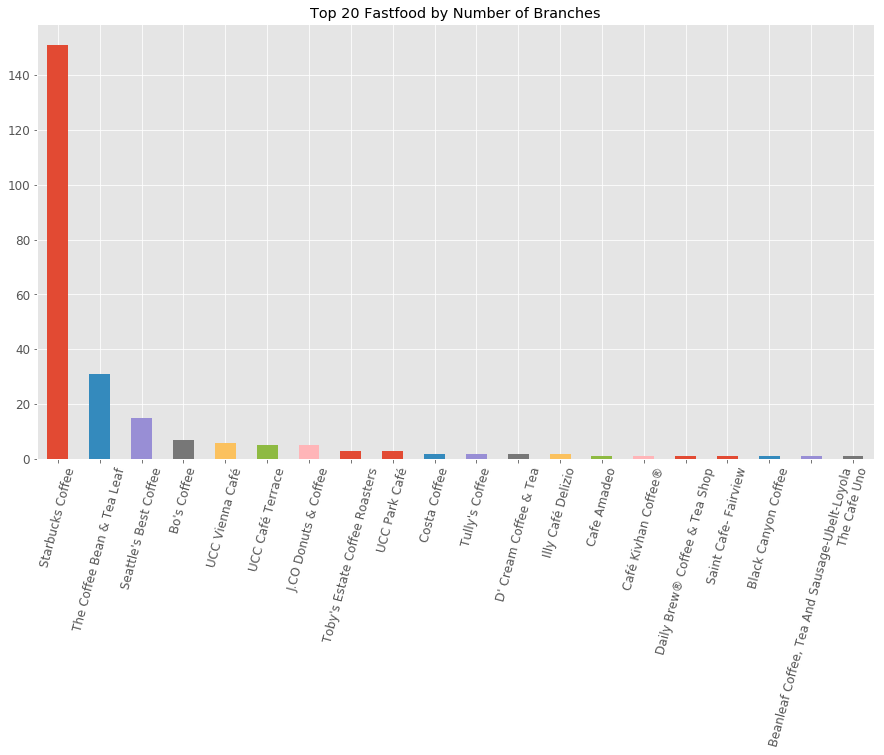

In [5]:
fig, ax = plt.subplots()
df['name'].value_counts().head(20).plot(ax=ax, kind='bar', \
                                        title ="Top 20 Fastfood by Number of Branches",figsize=(15,8), fontsize=12, rot=75)

In [6]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [7]:
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [8]:
df["cluster"] = y_kmeans

In [9]:
# df.head()

In [10]:
palette = sns.color_palette("pastel", 10).as_hex()
# palette

In [11]:
color_getter = lambda x: palette[int(x)]
df["color"] = df["cluster"].map(color_getter)
# df.head()

In [12]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
        fill=True,
        color =row["color"],
        popup = folium.Popup(row["name"], parse_html=True),
        fill_color=row["color"]).add_to(basemap)
    
basemap.save('coffeeshops.html')

# basemap

In [13]:
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

# 3. Explain what KMeans intertia is and how different it is from DBSCAN epsilon. ( 4pts )

KMeans intertia describes the coherence or distances of custers of points are from each other. Kmeans intertia deals with distances of points from a centroid while DBSCAN epsilon is a parameter that indicates the minimum distance for a neighboring point to be included in a cluster.

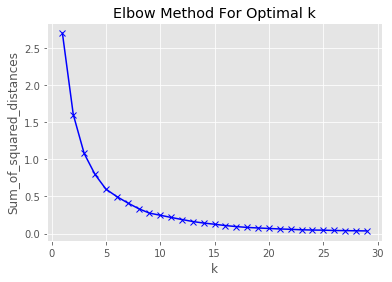

In [14]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# 4. Cluster the locations data with DBSCAN. ( 5pts )

In [15]:
from sklearn.cluster import DBSCAN
epsilon = 0.008
dbscan = DBSCAN(eps=epsilon, min_samples=5).fit(X)
y_dbscan = dbscan.labels_

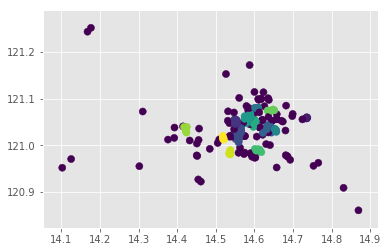

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')

In [17]:
df["dbscan_cluster"] = y_dbscan
palette = sns.color_palette("pastel", len(y_dbscan)).as_hex()
color_getter = lambda x: palette[int(x)]
df["db_color"] = df["dbscan_cluster"].map(color_getter)
df.head()

,id,name,lat,lng,checkins,address,cluster,color,dbscan_cluster,db_color
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)",3,#d0bbff,0,#92c6ff
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy",3,#d0bbff,0,#92c6ff
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave",3,#d0bbff,0,#92c6ff
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)",3,#d0bbff,0,#92c6ff
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City",2,#ff9f9a,1,#97f0aa


In [18]:
df = df[df["dbscan_cluster"] > -1]
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True,
    color =row["db_color"],
                        popup = folium.Popup(row["name"], parse_html=True),
    fill_color=row["db_color"]).add_to(basemap)
    
basemap.save('fast_food_db.html')

basemap

# 5. Present an analysis of the data following the DBSCAN results. ( 7pts )
- **Explain what the clusters mean**
- **What does the # of clusters tell us?**

The cluster pertains to geospatial hotspots or concentrations of coffeeshops given an area.

The number of clusters tells us that these grouped points are the only points that match the two parameters provided initially. These points are plenty enough and close enough to each other to merit a label of a cluster.

- **What can I use this information for**

This information can be used to gain a quick insight on concentration of coffeeshops, although it doesnt stop there. Analysis about coffeeshops can tell us more about other probable causes of existence of these shops or even the effects brought about their existence. 

For example, we can use the information of these concentrations to asses best placements for businesses that attract the same demographic as coffeeshops—people like students, business men, etc. 

Another example can be using the information to analyze what else is around these concentrations, such as schools, neighboring businesses, commercial zones and what not, and again, be able to plan ahead what other establishments or opportunities may arise from these locations.

# Bonus 1 : What is your favorite coffee shop? (1pt)

Equatorial Cafe behind KFC is my favorite. Their chicken parmigiana is the best!